In [1]:
import pandas as pd

import re
import string 
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.tokenize import sent_tokenize, word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
df = pd.read_csv('mental_health.csv')
df

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1
...,...,...
27972,posting everyday people stop caring religion ...,0
27973,okay definetly need hear guys opinion ive pret...,0
27974,cant get dog think ill kill myselfthe last thi...,1
27975,whats point princess bridei really think like ...,1


In [3]:
def make_lower(text):
    return text.lower()

In [4]:
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

In [5]:
df['text'] = df['text'].apply(make_lower)
df['text'] = df['text'].apply(remove_punct)
df.head()

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1


In [6]:
stop_words = stopwords.words('english')
stop_words.append('and')

In [7]:
X = df['text']

In [8]:
Xt = [word_tokenize(i) for i in X]

In [9]:
lem = WordNetLemmatizer()

def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    
    elif tag.startswith('N'):
        return wordnet.NOUN
    
    elif tag.startswith('V'):
        return wordnet.VERB
    
    elif tag.startswith('R'):
        return wordnet.ADV
    
    else:
        return wordnet.NOUN


def lem_clean(words):
    output = []
    for w in words:
        if w not in stop_words and w.isalpha() == True:
            pos = pos_tag([w])
            clean_word = lem.lemmatize(w, get_simple_pos(pos[0][1]))
            output.append(clean_word)
    return output

In [10]:
Xm = [lem_clean(i) for i in Xt]

In [11]:
Xf = [' '.join(i) for i in Xm]

In [12]:
df['tweetsCleaned'] = Xf
df

,text,label,tweetsCleaned
0,dear american teens question dutch person hear...,0,dear american teen question dutch person heard...
1,nothing look forward lifei dont many reasons k...,1,nothing look forward lifei dont many reason ke...
2,music recommendations im looking expand playli...,0,music recommendation im look expand playlist u...
3,im done trying feel betterthe reason im still ...,1,im do try feel betterthe reason im still alive...
4,worried year old girl subject domestic physic...,1,worried year old girl subject domestic physica...
...,...,...,...
27972,posting everyday people stop caring religion ...,0,post everyday people stop care religion matter...
27973,okay definetly need hear guys opinion ive pret...,0,okay definetly need hear guy opinion ive prett...
27974,cant get dog think ill kill myselfthe last thi...,1,cant get dog think ill kill myselfthe last thi...
27975,whats point princess bridei really think like ...,1,whats point princess bridei really think like ...


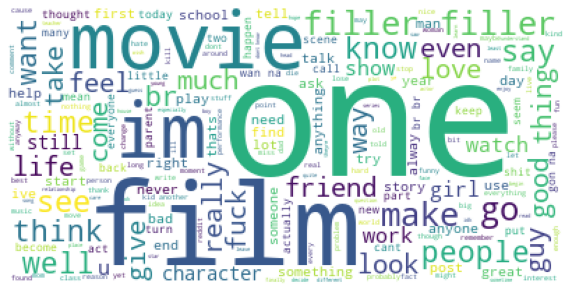

In [15]:
words0 = df[df['label'] == 0]['tweetsCleaned'].tolist()
combined_words = ' '.join(words0)
plt.figure(figsize = (10, 8))
plt.imshow(WordCloud(background_color = 'white').generate(combined_words))
plt.axis('off')
plt.show()

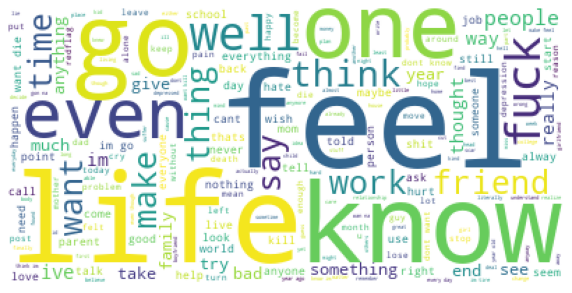

In [16]:
words1 = df[df['label'] == 1]['tweetsCleaned'].tolist()
combined_words1 = ' '.join(words1)
plt.figure(figsize = (10, 8))
plt.imshow(WordCloud(background_color = 'white').generate(combined_words1))
plt.axis('off')
plt.show()